In [1]:
import gzip
import h5py
import pickle
import os
import numpy as np
from farthest_point_sampling import img_to_point_cloud

try:
    from tqdm import trange
except ImportError:
    trange = range

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt

%matplotlib inline
plt.rcParams['image.interpolation'] = None
plt.rcParams['image.cmap'] = 'gray'

/usr/lib/python3/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
with gzip.open('data/mnist.pkl.gz','rb') as ff :     
    u = pickle._Unpickler( ff )
    u.encoding = 'latin1'
    train_set, valid_set, test_set = u.load()


In [3]:
print(train_set[0].shape)
print(valid_set[0].shape)
print(test_set[0].shape)

(50000, 784)
(10000, 784)
(10000, 784)


Digit label:  7


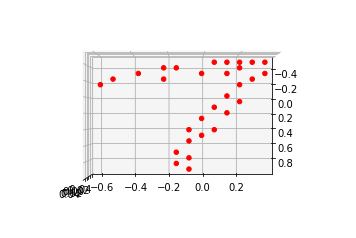

In [4]:
# test sample images and hyperparameters
k=30
idx = 34568

img = train_set[0][idx].reshape(28,28)
label = train_set[1][idx]
print('Digit label: ',label)

cloud_3D = img_to_point_cloud(img,k)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cloud_3D[:,0], cloud_3D[:,1], cloud_3D[:,2], color='r', marker='o')
ax.view_init(90, 0)
plt.show()


In [5]:
# function to save dataset to h5
def save_dataset(X, y, k, output):
    with h5py.File(output, "w") as hf:
        count = 0;
        for i in trange(len(X)):
            img = X[i].reshape(28, 28)
            
            cloud = img_to_point_cloud(img,k)
            
            if cloud is None:
                print('Skipping the ', i, '-th image.')
            else:
                grp = hf.create_group(str(count))
                grp.create_dataset("img", data=img, compression="gzip")
                grp.create_dataset("points", data=cloud, compression="gzip")
                grp.attrs["label"] = y[count]
                count += 1

In [6]:
OUTPUT_TRAIN = "data/train.h5"
N_TRAIN = train_set[0].shape[0]
OUTPUT_TEST = "data/test.h5"
N_TEST = test_set[0].shape[0]
OUTPUT_VALID = "data/valid.h5"
N_VALID = valid_set[0].shape[0]

In [7]:
k=30
if os.path.exists(OUTPUT_TRAIN):
    print (OUTPUT_TRAIN, "Already exists")
else:
    save_dataset(train_set[0][:N_TRAIN], train_set[1][:N_TRAIN], k, OUTPUT_TRAIN)

if os.path.exists(OUTPUT_TEST):
    print (OUTPUT_TEST, "Already exists")
else:
    save_dataset(test_set[0][:N_TEST], test_set[1][:N_TEST], k, OUTPUT_TEST)

if os.path.exists(OUTPUT_VALID):
    print (OUTPUT_VALID, "Already exists")
else:
    save_dataset(valid_set[0][:N_VALID], valid_set[1][:N_VALID], k, OUTPUT_VALID)

  2%|▏         | 1083/50000 [02:13<1:29:11,  9.14it/s]

No enough non-zero values in img.
Skipping the  1080 -th image.


  8%|▊         | 4066/50000 [08:31<1:25:30,  8.95it/s]

No enough non-zero values in img.
Skipping the  4064 -th image.


  9%|▉         | 4486/50000 [09:22<1:45:33,  7.19it/s]

No enough non-zero values in img.
Skipping the  4484 -th image.


 10%|▉         | 4902/50000 [10:21<1:28:51,  8.46it/s]

No enough non-zero values in img.
Skipping the  4900 -th image.


 10%|█         | 5000/50000 [10:32<1:20:19,  9.34it/s]

No enough non-zero values in img.
Skipping the  4998 -th image.


 11%|█▏        | 5650/50000 [12:02<1:29:34,  8.25it/s]

No enough non-zero values in img.
Skipping the  5648 -th image.


 12%|█▏        | 5763/50000 [12:17<1:23:53,  8.79it/s]

No enough non-zero values in img.
Skipping the  5760 -th image.


 14%|█▍        | 7224/50000 [15:24<1:02:31, 11.40it/s]

No enough non-zero values in img.
Skipping the  7222 -th image.


 15%|█▌        | 7659/50000 [16:10<1:24:56,  8.31it/s]

No enough non-zero values in img.
Skipping the  7656 -th image.


 16%|█▌        | 8082/50000 [17:08<1:37:58,  7.13it/s]

No enough non-zero values in img.
Skipping the  8080 -th image.


 16%|█▋        | 8164/50000 [17:18<1:10:45,  9.85it/s]

No enough non-zero values in img.
Skipping the  8162 -th image.


 16%|█▋        | 8179/50000 [17:19<1:06:18, 10.51it/s]

No enough non-zero values in img.
Skipping the  8176 -th image.


 17%|█▋        | 8333/50000 [17:38<1:12:27,  9.59it/s]

No enough non-zero values in img.
Skipping the  8330 -th image.


 17%|█▋        | 8384/50000 [17:45<1:15:26,  9.19it/s]

No enough non-zero values in img.
Skipping the  8382 -th image.


 17%|█▋        | 8404/50000 [17:48<1:10:44,  9.80it/s]

No enough non-zero values in img.
Skipping the  8402 -th image.


 24%|██▍       | 12160/50000 [26:01<1:15:58,  8.30it/s]

No enough non-zero values in img.
Skipping the  12158 -th image.


 27%|██▋       | 13334/50000 [28:42<1:24:58,  7.19it/s]

No enough non-zero values in img.
Skipping the  13334 -th image.


 27%|██▋       | 13392/50000 [28:49<1:08:42,  8.88it/s]

No enough non-zero values in img.
Skipping the  13390 -th image.


 28%|██▊       | 14228/50000 [30:40<1:20:06,  7.44it/s]

No enough non-zero values in img.
Skipping the  14228 -th image.


 32%|███▏      | 15974/50000 [34:12<1:19:29,  7.13it/s]

No enough non-zero values in img.
Skipping the  15974 -th image.


 32%|███▏      | 16206/50000 [34:43<55:51, 10.08it/s]  

No enough non-zero values in img.
Skipping the  16204 -th image.


 34%|███▍      | 16933/50000 [36:11<1:03:56,  8.62it/s]

No enough non-zero values in img.
Skipping the  16930 -th image.


 35%|███▌      | 17666/50000 [37:41<48:06, 11.20it/s]  

No enough non-zero values in img.
Skipping the  17664 -th image.


 36%|███▌      | 17902/50000 [38:07<50:51, 10.52it/s]  

No enough non-zero values in img.
Skipping the  17900 -th image.


 37%|███▋      | 18306/50000 [38:57<1:05:07,  8.11it/s]

No enough non-zero values in img.
Skipping the  18304 -th image.


 37%|███▋      | 18374/50000 [39:05<57:53,  9.11it/s]  

No enough non-zero values in img.
Skipping the  18372 -th image.


 39%|███▊      | 19284/50000 [40:56<1:02:18,  8.22it/s]

No enough non-zero values in img.
Skipping the  19282 -th image.


 39%|███▉      | 19484/50000 [41:25<1:05:14,  7.80it/s]

No enough non-zero values in img.
Skipping the  19482 -th image.


 40%|███▉      | 19920/50000 [42:27<59:39,  8.40it/s]  

No enough non-zero values in img.
Skipping the  19918 -th image.


 40%|████      | 20048/50000 [42:45<49:43, 10.04it/s]  

No enough non-zero values in img.
Skipping the  20046 -th image.


 40%|████      | 20132/50000 [42:57<1:05:44,  7.57it/s]

No enough non-zero values in img.
Skipping the  20132 -th image.


 42%|████▏     | 21092/50000 [44:59<46:33, 10.35it/s]  

No enough non-zero values in img.
Skipping the  21090 -th image.


 43%|████▎     | 21426/50000 [45:41<1:01:16,  7.77it/s]

No enough non-zero values in img.
Skipping the  21424 -th image.


 43%|████▎     | 21554/50000 [45:59<59:50,  7.92it/s]  

No enough non-zero values in img.
Skipping the  21552 -th image.


 43%|████▎     | 21621/50000 [46:06<49:48,  9.50it/s]  

No enough non-zero values in img.
Skipping the  21618 -th image.


 47%|████▋     | 23390/50000 [50:06<1:19:31,  5.58it/s]

No enough non-zero values in img.
Skipping the  23390 -th image.


 48%|████▊     | 24124/50000 [51:38<53:58,  7.99it/s]  

No enough non-zero values in img.
Skipping the  24122 -th image.


 48%|████▊     | 24128/50000 [51:38<45:40,  9.44it/s]

No enough non-zero values in img.
Skipping the  24126 -th image.


 50%|████▉     | 24841/50000 [53:10<48:54,  8.57it/s]  

No enough non-zero values in img.
Skipping the  24838 -th image.


 52%|█████▏    | 26174/50000 [55:57<45:00,  8.82it/s]  

No enough non-zero values in img.
Skipping the  26174 -th image.


 53%|█████▎    | 26268/50000 [56:09<56:06,  7.05it/s]  

No enough non-zero values in img.
Skipping the  26268 -th image.


 54%|█████▎    | 26814/50000 [57:13<39:17,  9.84it/s]  

No enough non-zero values in img.
Skipping the  26812 -th image.


 55%|█████▌    | 27584/50000 [58:51<40:26,  9.24it/s]  

No enough non-zero values in img.
Skipping the  27582 -th image.


 59%|█████▊    | 29287/50000 [1:02:36<45:14,  7.63it/s]  

No enough non-zero values in img.
Skipping the  29284 -th image.


 63%|██████▎   | 31496/50000 [1:07:00<30:47, 10.01it/s]  

No enough non-zero values in img.
Skipping the  31494 -th image.


 65%|██████▌   | 32743/50000 [1:09:34<33:00,  8.71it/s]  

No enough non-zero values in img.
Skipping the  32743 -th image.


 66%|██████▋   | 33126/50000 [1:10:23<28:54,  9.73it/s]

No enough non-zero values in img.
Skipping the  33124 -th image.


 67%|██████▋   | 33518/50000 [1:11:12<26:37, 10.32it/s]

No enough non-zero values in img.
Skipping the  33516 -th image.


 67%|██████▋   | 33708/50000 [1:11:33<27:59,  9.70it/s]

No enough non-zero values in img.
Skipping the  33706 -th image.


 68%|██████▊   | 33926/50000 [1:12:03<39:14,  6.83it/s]

No enough non-zero values in img.
Skipping the  33924 -th image.


 71%|███████   | 35450/50000 [1:15:15<30:37,  7.92it/s]

No enough non-zero values in img.
Skipping the  35448 -th image.


 71%|███████   | 35554/50000 [1:15:29<24:05, 10.00it/s]

No enough non-zero values in img.
Skipping the  35552 -th image.


 72%|███████▏  | 35800/50000 [1:16:00<26:37,  8.89it/s]

No enough non-zero values in img.
Skipping the  35798 -th image.


 72%|███████▏  | 36044/50000 [1:16:26<20:12, 11.51it/s]

No enough non-zero values in img.
Skipping the  36042 -th image.


 73%|███████▎  | 36390/50000 [1:17:14<23:43,  9.56it/s]

No enough non-zero values in img.
Skipping the  36388 -th image.


 73%|███████▎  | 36684/50000 [1:17:55<31:16,  7.10it/s]

No enough non-zero values in img.
Skipping the  36682 -th image.


 74%|███████▍  | 37112/50000 [1:18:55<33:15,  6.46it/s]

No enough non-zero values in img.
Skipping the  37110 -th image.


 76%|███████▌  | 37923/50000 [1:20:43<23:53,  8.42it/s]

No enough non-zero values in img.
Skipping the  37920 -th image.


 77%|███████▋  | 38468/50000 [1:21:49<15:19, 12.54it/s]

No enough non-zero values in img.
Skipping the  38466 -th image.


 80%|████████  | 40060/50000 [1:25:13<14:40, 11.29it/s]

No enough non-zero values in img.
Skipping the  40058 -th image.


 81%|████████▏ | 40698/50000 [1:26:36<15:29, 10.01it/s]

No enough non-zero values in img.
Skipping the  40696 -th image.


 82%|████████▎ | 41250/50000 [1:27:41<13:48, 10.56it/s]

No enough non-zero values in img.
Skipping the  41248 -th image.


 83%|████████▎ | 41543/50000 [1:28:18<14:19,  9.84it/s]

No enough non-zero values in img.
Skipping the  41542 -th image.


 84%|████████▎ | 41826/50000 [1:28:48<10:58, 12.42it/s]

No enough non-zero values in img.
Skipping the  41823 -th image.


 84%|████████▍ | 41908/50000 [1:28:59<26:23,  5.11it/s]

No enough non-zero values in img.
Skipping the  41908 -th image.


 84%|████████▍ | 41958/50000 [1:29:05<16:06,  8.32it/s]

No enough non-zero values in img.
Skipping the  41956 -th image.


 86%|████████▌ | 42874/50000 [1:31:08<15:15,  7.79it/s]

No enough non-zero values in img.
Skipping the  42874 -th image.


 91%|█████████ | 45292/50000 [1:36:05<09:14,  8.49it/s]

No enough non-zero values in img.
Skipping the  45290 -th image.


 92%|█████████▏| 45903/50000 [1:37:19<07:06,  9.61it/s]

No enough non-zero values in img.
Skipping the  45900 -th image.


 95%|█████████▌| 47580/50000 [1:40:43<06:43,  5.99it/s]

No enough non-zero values in img.
Skipping the  47580 -th image.


 99%|█████████▉| 49392/50000 [1:44:48<01:21,  7.48it/s]

No enough non-zero values in img.
Skipping the  49392 -th image.


 99%|█████████▉| 49422/50000 [1:44:52<01:24,  6.81it/s]

No enough non-zero values in img.
Skipping the  49420 -th image.


  0%|          | 42/10000 [00:04<14:13, 11.67it/s]

No enough non-zero values in img.
Skipping the  40 -th image.


  2%|▏         | 178/10000 [00:19<15:02, 10.88it/s]

No enough non-zero values in img.
Skipping the  176 -th image.


  2%|▏         | 226/10000 [00:25<20:58,  7.76it/s]

No enough non-zero values in img.
Skipping the  224 -th image.


  9%|▉         | 920/10000 [01:46<14:14, 10.62it/s]

No enough non-zero values in img.
Skipping the  918 -th image.


 10%|▉         | 966/10000 [01:51<13:44, 10.96it/s]

No enough non-zero values in img.
Skipping the  964 -th image.


 22%|██▏       | 2247/10000 [04:19<12:19, 10.49it/s]

No enough non-zero values in img.
Skipping the  2245 -th image.


 25%|██▌       | 2535/10000 [04:52<12:19, 10.09it/s]

No enough non-zero values in img.
Skipping the  2532 -th image.


 26%|██▌       | 2578/10000 [04:57<12:00, 10.30it/s]

No enough non-zero values in img.
Skipping the  2576 -th image.


 27%|██▋       | 2691/10000 [05:10<11:42, 10.40it/s]

No enough non-zero values in img.
Skipping the  2689 -th image.


 29%|██▊       | 2867/10000 [05:31<14:36,  8.13it/s]

No enough non-zero values in img.
Skipping the  2867 -th image.


 30%|███       | 3041/10000 [05:51<13:21,  8.68it/s]

No enough non-zero values in img.
Skipping the  3039 -th image.


 32%|███▏      | 3198/10000 [06:08<11:27,  9.89it/s]

No enough non-zero values in img.
Skipping the  3196 -th image.


 39%|███▊      | 3854/10000 [07:27<11:25,  8.96it/s]

No enough non-zero values in img.
Skipping the  3851 -th image.


 40%|███▉      | 3974/10000 [07:41<12:27,  8.06it/s]

No enough non-zero values in img.
Skipping the  3974 -th image.


 41%|████      | 4052/10000 [07:50<11:06,  8.93it/s]

No enough non-zero values in img.
Skipping the  4050 -th image.


 46%|████▋     | 4648/10000 [09:00<09:15,  9.63it/s]

No enough non-zero values in img.
Skipping the  4646 -th image.


 47%|████▋     | 4678/10000 [09:03<09:07,  9.72it/s]

No enough non-zero values in img.
Skipping the  4676 -th image.


 47%|████▋     | 4721/10000 [09:08<09:10,  9.58it/s]

No enough non-zero values in img.
Skipping the  4719 -th image.


 49%|████▊     | 4866/10000 [09:25<09:40,  8.84it/s]

No enough non-zero values in img.
Skipping the  4864 -th image.


 66%|██████▌   | 6575/10000 [13:23<03:53, 14.67it/s]

No enough non-zero values in img.
Skipping the  6572 -th image.


 66%|██████▌   | 6579/10000 [13:23<03:19, 17.19it/s]

No enough non-zero values in img.
Skipping the  6576 -th image.


 15%|█▍        | 1470/10000 [03:04<22:39,  6.27it/s]

No enough non-zero values in img.
Skipping the  1468 -th image.


 15%|█▌        | 1542/10000 [03:13<14:42,  9.58it/s]

No enough non-zero values in img.
Skipping the  1540 -th image.


 16%|█▌        | 1596/10000 [03:20<16:10,  8.66it/s]

No enough non-zero values in img.
Skipping the  1594 -th image.


 17%|█▋        | 1726/10000 [03:36<14:02,  9.82it/s]

No enough non-zero values in img.
Skipping the  1724 -th image.


 26%|██▌       | 2623/10000 [05:22<13:19,  9.23it/s]

No enough non-zero values in img.
Skipping the  2622 -th image.


 33%|███▎      | 3312/10000 [06:48<12:34,  8.87it/s]

No enough non-zero values in img.
Skipping the  3310 -th image.


 36%|███▌      | 3594/10000 [07:21<09:31, 11.21it/s]

No enough non-zero values in img.
Skipping the  3594 -th image.


 38%|███▊      | 3794/10000 [07:43<09:46, 10.59it/s]

No enough non-zero values in img.
Skipping the  3792 -th image.


 43%|████▎     | 4312/10000 [08:45<09:28, 10.00it/s]

No enough non-zero values in img.
Skipping the  4310 -th image.


 47%|████▋     | 4666/10000 [09:33<12:28,  7.12it/s]

No enough non-zero values in img.
Skipping the  4664 -th image.


 52%|█████▏    | 5224/10000 [10:44<10:19,  7.71it/s]

No enough non-zero values in img.
Skipping the  5222 -th image.


 58%|█████▊    | 5789/10000 [11:59<07:54,  8.88it/s]

No enough non-zero values in img.
Skipping the  5786 -th image.


 61%|██████    | 6073/10000 [12:36<09:10,  7.13it/s]

No enough non-zero values in img.
Skipping the  6071 -th image.


 64%|██████▍   | 6376/10000 [13:12<05:24, 11.15it/s]

No enough non-zero values in img.
Skipping the  6374 -th image.


 65%|██████▌   | 6538/10000 [13:31<05:54,  9.78it/s]

No enough non-zero values in img.
Skipping the  6538 -th image.


 74%|███████▎  | 7364/10000 [15:11<05:21,  8.20it/s]

No enough non-zero values in img.
Skipping the  7362 -th image.


100%|██████████| 10000/10000 [20:40<00:00,  8.06it/s]
